# Houisng Dataset Analyis

### LOAD DATA

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("C:\\Users\\TOFFICK\\Documents\\GitHub\\Housing_data_analysis\\Housing_dataset_cleaned.csv")

### BASIC INVESTIGATION

In [3]:
data.head()

,area_type,availability,location,bhk,size_comp,total_sqft,bath,balcony,price
0,Super built-up Area,Date Set,Electronic City Phase II,2,BHK,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Bedroom,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,BHK,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,BHK,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,BHK,1200.0,2,1,51.00


In [4]:
data.tail()

,area_type,availability,location,bhk,size_comp,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5,Bedroom,3453.0,4,0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4,BHK,3600.0,5,2,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2,BHK,1141.0,2,1,60.0
13318,Super built-up Area,Date Set,Padmanabhanagar,4,BHK,4689.0,4,1,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1,BHK,550.0,1,1,17.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   bhk           13320 non-null  int64  
 4   size_comp     13320 non-null  object 
 5   total_sqft    13320 non-null  float64
 6   bath          13320 non-null  int64  
 7   balcony       13320 non-null  int64  
 8   price         13320 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 936.7+ KB


In [6]:
data.shape

(13320, 9)

### DATA CLEANING

In [7]:
data.isnull().sum()

area_type       0
availability    0
location        0
bhk             0
size_comp       0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

##### FINDING THE UNIQUE VALUE COUNTS IN THE COLUMNS

In [8]:
data.area_type.value_counts()

#for column in data.columns:
  #print(data[column].value_counts())

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
data.availability.value_counts()

Ready To Move           10581
Date Set                 2723
Immediate Possession       16
Name: availability, dtype: int64

In [10]:
data.bhk.value_counts()

2     5544
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
16       1
27       1
43       1
18       1
12       1
13       1
14       1
19       1
Name: bhk, dtype: int64

In [11]:
data.total_sqft.value_counts()

1200.00    843
1100.00    221
1500.00    206
2400.00    197
600.00     180
          ... 
7502.45      1
2108.00      1
5656.00      1
1471.00      1
499.00       1
Name: total_sqft, Length: 2033, dtype: int64

In [12]:
data.bath.value_counts()

2     6981
3     3286
4     1226
1      788
5      524
6      273
7      102
8       64
9       43
10      13
12       7
13       3
11       3
16       2
27       1
18       1
14       1
40       1
15       1
Name: bath, dtype: int64

In [13]:
data.balcony.value_counts()

2    5722
1    4897
3    1672
0    1029
Name: balcony, dtype: int64

In [14]:
data.price.value_counts()

75.00     310
65.00     302
55.00     275
60.00     270
45.00     240
         ... 
8.00        1
36.38       1
35.29       1
296.00      1
62.28       1
Name: price, Length: 1980, dtype: int64

In [15]:
data.location.value_counts()

Whitefield                            541
Sarjapur  Road                        399
Electronic City                       302
Kanakpura Road                        273
Thanisandra                           234
                                     ... 
Banashankari 6th stage , 2nd block      1
Banashankari 2nd Stage                  1
Sathanur                                1
Karnataka Shabarimala                   1
Fraser town                             1
Name: location, Length: 1305, dtype: int64

In [16]:
## dROPPING COLUMNS 
df1=data.drop(['area_type', 'availability','size_comp'], axis = 1)

In [17]:
## rechecking the head
df1.head()

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1,39.07
1,Chikka Tirupathi,4,2600.0,5,3,120.00
2,Uttarahalli,3,1440.0,2,3,62.00
3,Lingadheeranahalli,3,1521.0,3,1,95.00
4,Kothanur,2,1200.0,2,1,51.00


### Return ‘other’ if the count of location is less than 10.

In [18]:
# location less than 10 
df1.location.value_counts() < 10

Whitefield                            False
Sarjapur  Road                        False
Electronic City                       False
Kanakpura Road                        False
Thanisandra                           False
                                      ...  
Banashankari 6th stage , 2nd block     True
Banashankari 2nd Stage                 True
Sathanur                               True
Karnataka Shabarimala                  True
Fraser town                            True
Name: location, Length: 1305, dtype: bool

In [19]:
df2 = df1.copy()

In [20]:
df2['location'] = df2['location'].apply(lambda x: x.strip())


In [21]:
location_count=df2.location.value_counts()


In [22]:
location_count

Whitefield         542
Sarjapur  Road     399
Electronic City    304
Kanakpura Road     273
Thanisandra        237
                  ... 
Kalasipalya          1
Gulakamale           1
Puttappa Layout      1
Bharat Nagar         1
Fraser town          1
Name: location, Length: 1294, dtype: int64

In [23]:
location_count_10 = location_count[location_count < 10]

In [24]:
location_count_10

Kaverappa Layout    9
Banagiri Nagar      9
Ejipura             9
Kamakshipalya       9
Lingarajapuram      9
                   ..
Kalasipalya         1
Gulakamale          1
Puttappa Layout     1
Bharat Nagar        1
Fraser town         1
Name: location, Length: 1040, dtype: int64

In [25]:
df3=df2.copy()

In [26]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in location_count_10 else x)

In [27]:
df3.location.value_counts()

other                   2755
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
                        ... 
Sadashiva Nagar           10
Nagappa Reddy Layout      10
Ganga Nagar               10
Nagadevanahalli           10
BTM 1st Stage             10
Name: location, Length: 255, dtype: int64

#### Remove outliers from the bhk features,all bhk removed from where bhk less than 300 sqfeet.

In [28]:
df3 = df3[~(df3.total_sqft/df3.bhk < 300)]

In [29]:
df3

,location,bhk,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056.0,2,1,39.07
1,Chikka Tirupathi,4,2600.0,5,3,120.00
2,Uttarahalli,3,1440.0,2,3,62.00
3,Lingadheeranahalli,3,1521.0,3,1,95.00
4,Kothanur,2,1200.0,2,1,51.00
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4,0,231.00
13316,other,4,3600.0,5,2,400.00
13317,Raja Rajeshwari Nagar,2,1141.0,2,1,60.00
13318,Padmanabhanagar,4,4689.0,4,1,488.00


In [30]:
df3['Actual Price']=df3['price']*10000

In [31]:
df3['per_sq_feet_price'] = (df3['price']*100000)/df3['total_sqft']

In [32]:
df3['per_sq_feet_price'].describe()

count     12562.000000
mean       6295.954463
std        4162.808919
min          30.609122
25%        4204.039099
50%        5291.005291
75%        6916.029840
max      176470.588235
Name: per_sq_feet_price, dtype: float64

##### Standard Deviation technique to remove the outliers from the per_sq_feet_price.

In [33]:
def rmv_outlierBy_std(x):
    out_df = pd.DataFrame()
    for key, subdf in x.groupby('location'):
        mean = np.mean(subdf.per_sq_feet_price)
        std = np.std(subdf.per_sq_feet_price)
        reduced_df = subdf[(subdf.per_sq_feet_price > (mean - std)) & (subdf.per_sq_feet_price < (mean + std))]
        out_df = pd.concat([out_df, reduced_df], ignore_index = True)
    return out_df

df4 = rmv_outlierBy_std(df3)

In [34]:
df4

,location,bhk,total_sqft,bath,balcony,price,Actual Price,per_sq_feet_price
0,1st Block Jayanagar,4,2850.0,4,1,428.00,4280000.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3,2,194.00,1940000.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2,3,235.00,2350000.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2,0,130.00,1300000.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2,2,148.00,1480000.0,11983.805668
...,...,...,...,...,...,...,...,...
10299,other,2,1353.0,2,2,110.00,1100000.0,8130.081301
10300,other,1,812.0,1,0,26.00,260000.0,3201.970443
10301,other,3,1440.0,2,2,63.93,639300.0,4439.583333
10302,other,2,1075.0,2,2,48.00,480000.0,4465.116279


##### Now we can remove those 2 BHK apartments whose per_sq_feet_price is less than mean per_sq_feet_price of 1 BHK apartment

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sq_feet_price),
                'std': np.std(bhk_df.per_sq_feet_price),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sq_feet_price<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)

In [36]:
df5

,location,bhk,total_sqft,bath,balcony,price,Actual Price,per_sq_feet_price
0,1st Block Jayanagar,4,2850.0,4,1,428.0,4280000.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3,2,194.0,1940000.0,11901.840491
2,1st Block Jayanagar,3,1875.0,2,3,235.0,2350000.0,12533.333333
3,1st Block Jayanagar,3,1200.0,2,0,130.0,1300000.0,10833.333333
4,1st Block Jayanagar,2,1235.0,2,2,148.0,1480000.0,11983.805668
...,...,...,...,...,...,...,...,...
10295,other,2,1200.0,2,3,70.0,700000.0,5833.333333
10296,other,1,1800.0,1,1,200.0,2000000.0,11111.111111
10299,other,2,1353.0,2,2,110.0,1100000.0,8130.081301
10300,other,1,812.0,1,0,26.0,260000.0,3201.970443


In [37]:
df5[df5.bath > 10]

,location,bhk,total_sqft,bath,balcony,price,Actual Price,per_sq_feet_price
587,BTM 1st Stage,9,3300.0,14,2,500.0,5000000.0,15151.515152
5393,Neeladri Nagar,10,4000.0,12,2,160.0,1600000.0,4000.000000
8622,other,10,12000.0,12,2,525.0,5250000.0,4375.000000
8707,other,16,10000.0,16,2,550.0,5500000.0,5500.000000
9405,other,11,6000.0,12,2,150.0,1500000.0,2500.000000
9720,other,13,5425.0,13,0,275.0,2750000.0,5069.124424


Text(0, 0.5, 'Count')

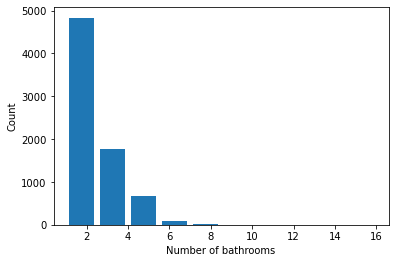

In [38]:
import matplotlib.pyplot as plt
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [39]:
df6 = df5[df5.bath < df5.bhk + 2]

In [40]:
df6.shape

(7336, 8)

In [41]:
df_final = df6.drop(['per_sq_feet_price'], axis = 1)

In [42]:
df_final.head()

,location,bhk,total_sqft,bath,balcony,price,Actual Price
0,1st Block Jayanagar,4,2850.0,4,1,428.0,4280000.0
1,1st Block Jayanagar,3,1630.0,3,2,194.0,1940000.0
2,1st Block Jayanagar,3,1875.0,2,3,235.0,2350000.0
3,1st Block Jayanagar,3,1200.0,2,0,130.0,1300000.0
4,1st Block Jayanagar,2,1235.0,2,2,148.0,1480000.0


In [43]:
## filling in location
# filling with most common class
#data_clean1=data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [44]:
#data_clean1.isnull().sum()

In [45]:
df_final.to_csv('C://Users//TOFFICK//Documents//GitHub//Housing_data_analysis//cleaned_data_jupyter.csv')


#### One hot encoding to convert a categorical location feature into numeric feature. And store into a “dummies” data set.

In [59]:
dummies = pd.get_dummies(df_final.location)

In [60]:
dummies

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
df_final = pd.concat([df_final, dummies], axis = 1)

In [62]:
df_final = df_final.drop(['location'], axis = 1)

In [63]:
df_final.head()

,bhk,total_sqft,bath,balcony,price,Actual Price,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,4,2850.0,4,1,428.0,4280000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3,2,194.0,1940000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2,3,235.0,2350000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2,0,130.0,1300000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2,2,148.0,1480000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Building a supervised leaning model 

In [64]:
X = df_final.drop(['price','Actual Price'], axis = 1)

In [65]:
Y = df_final['price']

## Using linear regression to build the model 

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [69]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5135, 259), (2201, 259), (5135,), (2201,))

In [70]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.49385455639823317